# Hyperparameter tuning for neural network

> Back Propagation Implementation - December 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

This notebook explores different combinations of hyperparameters to identify the best configuration for a neural network. 
We will evaluate at least 10 combinations of the following hyperparameters:

- **Number of layers**
- **Layer structure**
- **Number of epochs**
- **Learning rate**
- **Momentum**
- **Activation function**

Metrics evaluated:
- **Mean Absolute Percentage Error (MAPE)**
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

Plots included:
- Scatter plots of predicted vs true values for representative combinations.
- Training and validation loss evolution over epochs.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.NeuralNet import NeuralNet  # Import my neural network (BP) implementation

First of all, let's retrieve the processed dataset. We can do it by directly importing the previously splitted csv files (X_train,y_train,X_test, y_test) or the entire dataset and split it here. Since we have to convert Pandas dataframes into NumPy arrays, we will import the dataset because it will be easier to handle.

In [7]:
#read the csv data
df = pd.read_csv('../data/preprocessed_data.csv', decimal=".")
df.describe()

,carat,depth,table,price,x,y,z,cut,color,clarity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.280240,0.505286,0.461777,0.238041,0.396705,0.393487,0.531269,4.03250,4.491200,4.122700
std,0.205366,0.185826,0.178385,0.236658,0.224503,0.215652,0.169724,1.01368,1.676187,1.647457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
25%,0.094444,0.389831,0.350877,0.048468,0.188506,0.191111,0.370787,3.00000,3.000000,3.000000
50%,0.222222,0.525424,0.438596,0.148520,0.373563,0.373333,0.514045,4.00000,4.000000,4.000000
75%,0.450000,0.627119,0.614035,0.365198,0.593103,0.582222,0.685393,5.00000,6.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.00000,7.000000,8.000000


Convert to arrays

In [8]:
# Select the target column by name
output_column = 'price'
targets = df[output_column].values

# Select all columns except the target column
input_columns = df.columns[df.columns != output_column]
features = df[input_columns].values

print(features.shape)
print(targets.shape)

(10000, 9)
(10000,)


Split into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state= 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


This function tries different combinations of hyperparameters for my neural network to determine the best configuration that minimizes prediction errors (MSE, MAE, MAPE). It evaluates the performance of each configuration on a validation dataset and collects the results.



In [12]:
def hyperparameter_search(X_train, y_train, X_val, y_val):
    hyperparameters = [
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "sigmoid"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "tanh"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "relu"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "linear"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.5, "activation": "sigmoid"},
        {"layers": [9, 16, 8, 1], "epochs": 100, "lr": 0.001, "momentum": 0.9, "activation": "tanh"},
        {"layers": [9, 16, 16, 8, 1], "epochs": 100, "lr": 0.01, "momentum": 0.5, "activation": "tanh"},
        {"layers": [9, 8, 4, 1], "epochs": 200, "lr": 0.01, "momentum": 0.9, "activation": "relu"},
        {"layers": [9, 12, 6, 1], "epochs": 150, "lr": 0.01, "momentum": 0.7, "activation": "sigmoid"},
        {"layers": [9, 32, 16, 1], "epochs": 150, "lr": 0.001, "momentum": 0.6, "activation": "tanh"},
        {"layers": [9, 10, 5, 1], "epochs": 120, "lr": 0.005, "momentum": 0.7, "activation": "sigmoid"},
        {"layers": [9, 32, 16, 8, 1], "epochs": 100, "lr": 0.01, "momentum": 0.8, "activation": "tanh"},
    ]
    
    results = []
    
    for params in hyperparameters:
        # Unpack the parameters
        layers = params["layers"]
        epochs = params["epochs"]
        lr = params["lr"]
        momentum = params["momentum"]
        activation = params["activation"]
    
        print(f"Testing configuration: {params}")
    
        # Initialize and train the network
        nn = NeuralNet(layers, epochs, lr, momentum, activation, val_split=0.2)
        nn.fit(X_train, y_train)
    
        # Predict and evaluate
        y_pred = nn.predict(X_val)
        
        # Convert predictions and true values to numpy arrays
        y_val = np.array(y_val)
        y_pred = np.array(y_pred)
        
        # Mean Squared Error (MSE)
        total_error = 0
        for y_predicted, y_real in zip(y_pred, y_val):
            total_error += (y_real - y_predicted) ** 2
        mse = total_error / len(y_val)
        
        # Mean Absolute Error (MAE)
        total_error = 0
        for y_predicted, y_real in zip(y_pred, y_val):
            total_error += abs(y_real - y_predicted)
        mae = total_error / len(y_val)
        
        # Mean Absolute Percentage Error (MAPE)
        total_error = 0
        epsilon = 1e-7  # Avoid division by zero
        for y_predicted, y_real in zip(y_pred, y_val):
            if y_real != 0:
                total_error += abs((y_real - y_predicted) / (y_real + epsilon))
        mape = (total_error / len(y_val)) * 100
  
        # Store results
        results.append({
            "Layers": layers,
            "Epochs": epochs,
            "Learning Rate": lr,
            "Momentum": momentum,
            "Activation": activation,
            "MSE": mse,
            "MAE": mae,
            "MAPE": mape,

        })
    
    return pd.DataFrame(results)

In [13]:
results = hyperparameter_search(X_train, y_train, X_test, y_test)

# Sort and display results
results_sorted = results.sort_values(by="MSE", ascending=True)
print(results_sorted)

Testing configuration: {'layers': [9, 8, 4, 1], 'epochs': 100, 'lr': 0.1, 'momentum': 0.8, 'activation': 'sigmoid'}
Epoch 1/100, Train Loss: 0.055098603164829424, Val Loss: 0.059876465891967934
Epoch 2/100, Train Loss: 0.05320748327813723, Val Loss: 0.05803558686405285
Epoch 3/100, Train Loss: 0.012262954248888087, Val Loss: 0.013078766254321576
Epoch 4/100, Train Loss: 0.0055053650861585915, Val Loss: 0.005771754371480451
Epoch 5/100, Train Loss: 0.004322567424127307, Val Loss: 0.004498523414596517
Epoch 6/100, Train Loss: 0.003773247708462887, Val Loss: 0.003926606689888854
Epoch 7/100, Train Loss: 0.0035087941433231203, Val Loss: 0.003661345864783202
Epoch 8/100, Train Loss: 0.0033333133963984974, Val Loss: 0.003492179830826493
Epoch 9/100, Train Loss: 0.003199419338508546, Val Loss: 0.0033690756240233504
Epoch 10/100, Train Loss: 0.0031089689948100084, Val Loss: 0.0032913268806537836
Epoch 11/100, Train Loss: 0.0030634596364456684, Val Loss: 0.003257960391037506
Epoch 12/100, Train

Best Parameters: Layers                      [9, 8, 4, 1]
Epochs                               100
Learning Rate                        0.1
Momentum                             0.8
Activation                       sigmoid
MSE              [0.0016193403259786138]
MAE               [0.025596452509437925]
MAPE                [22.445257679121653]
Name: 0, dtype: object
Epoch 1/100, Train Loss: 0.055098603164829424, Val Loss: 0.059876465891967934
Epoch 2/100, Train Loss: 0.05320748327813723, Val Loss: 0.05803558686405285
Epoch 3/100, Train Loss: 0.012262954248888087, Val Loss: 0.013078766254321576
Epoch 4/100, Train Loss: 0.0055053650861585915, Val Loss: 0.005771754371480451
Epoch 5/100, Train Loss: 0.004322567424127307, Val Loss: 0.004498523414596517
Epoch 6/100, Train Loss: 0.003773247708462887, Val Loss: 0.003926606689888854
Epoch 7/100, Train Loss: 0.0035087941433231203, Val Loss: 0.003661345864783202
Epoch 8/100, Train Loss: 0.0033333133963984974, Val Loss: 0.003492179830826493
Epoch 9

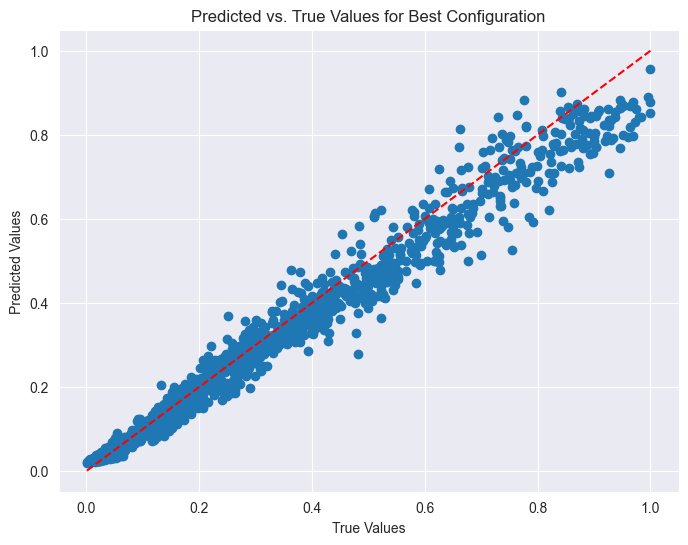

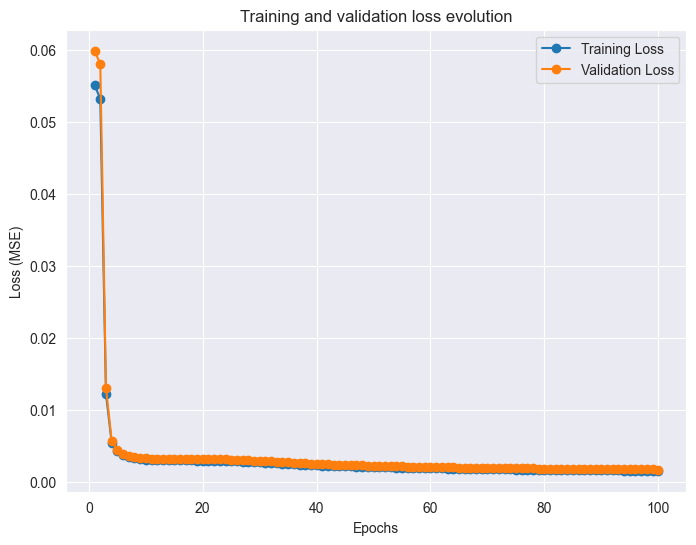

In [14]:
# Best configuration
best_params = results.loc[results["MSE"].idxmin()]
print("Best Parameters:", best_params)

# Scatter plot for best configuration
nn_best = NeuralNet(
    best_params["Layers"],
    best_params["Epochs"],
    best_params["Learning Rate"],
    best_params["Momentum"],
    best_params["Activation"],
    val_split=0.2
)
nn_best.fit(X_train, y_train)
y_best_pred = nn_best.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs. True Values for Best Configuration")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# Loss plot for best configuration
train_losses, val_losses = nn_best.loss_epochs()
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and validation loss evolution")
plt.legend()
plt.show()